In [1]:
!pip install numpy
!pip install sklearn
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\Christopher\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\Christopher\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\Christopher\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\Christopher\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\Christopher\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


Data Import

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Lin Reg
from sklearn.linear_model import LinearRegression
# Tree
from sklearn.tree import DecisionTreeClassifier
# Support Vector Machine
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Log Reg
from sklearn.linear_model import LogisticRegression
# GridSearchCv for optimization
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
df = pd.read_csv("Covid Data.csv")
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [4]:
df.dtypes


USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2 

<AxesSubplot:>

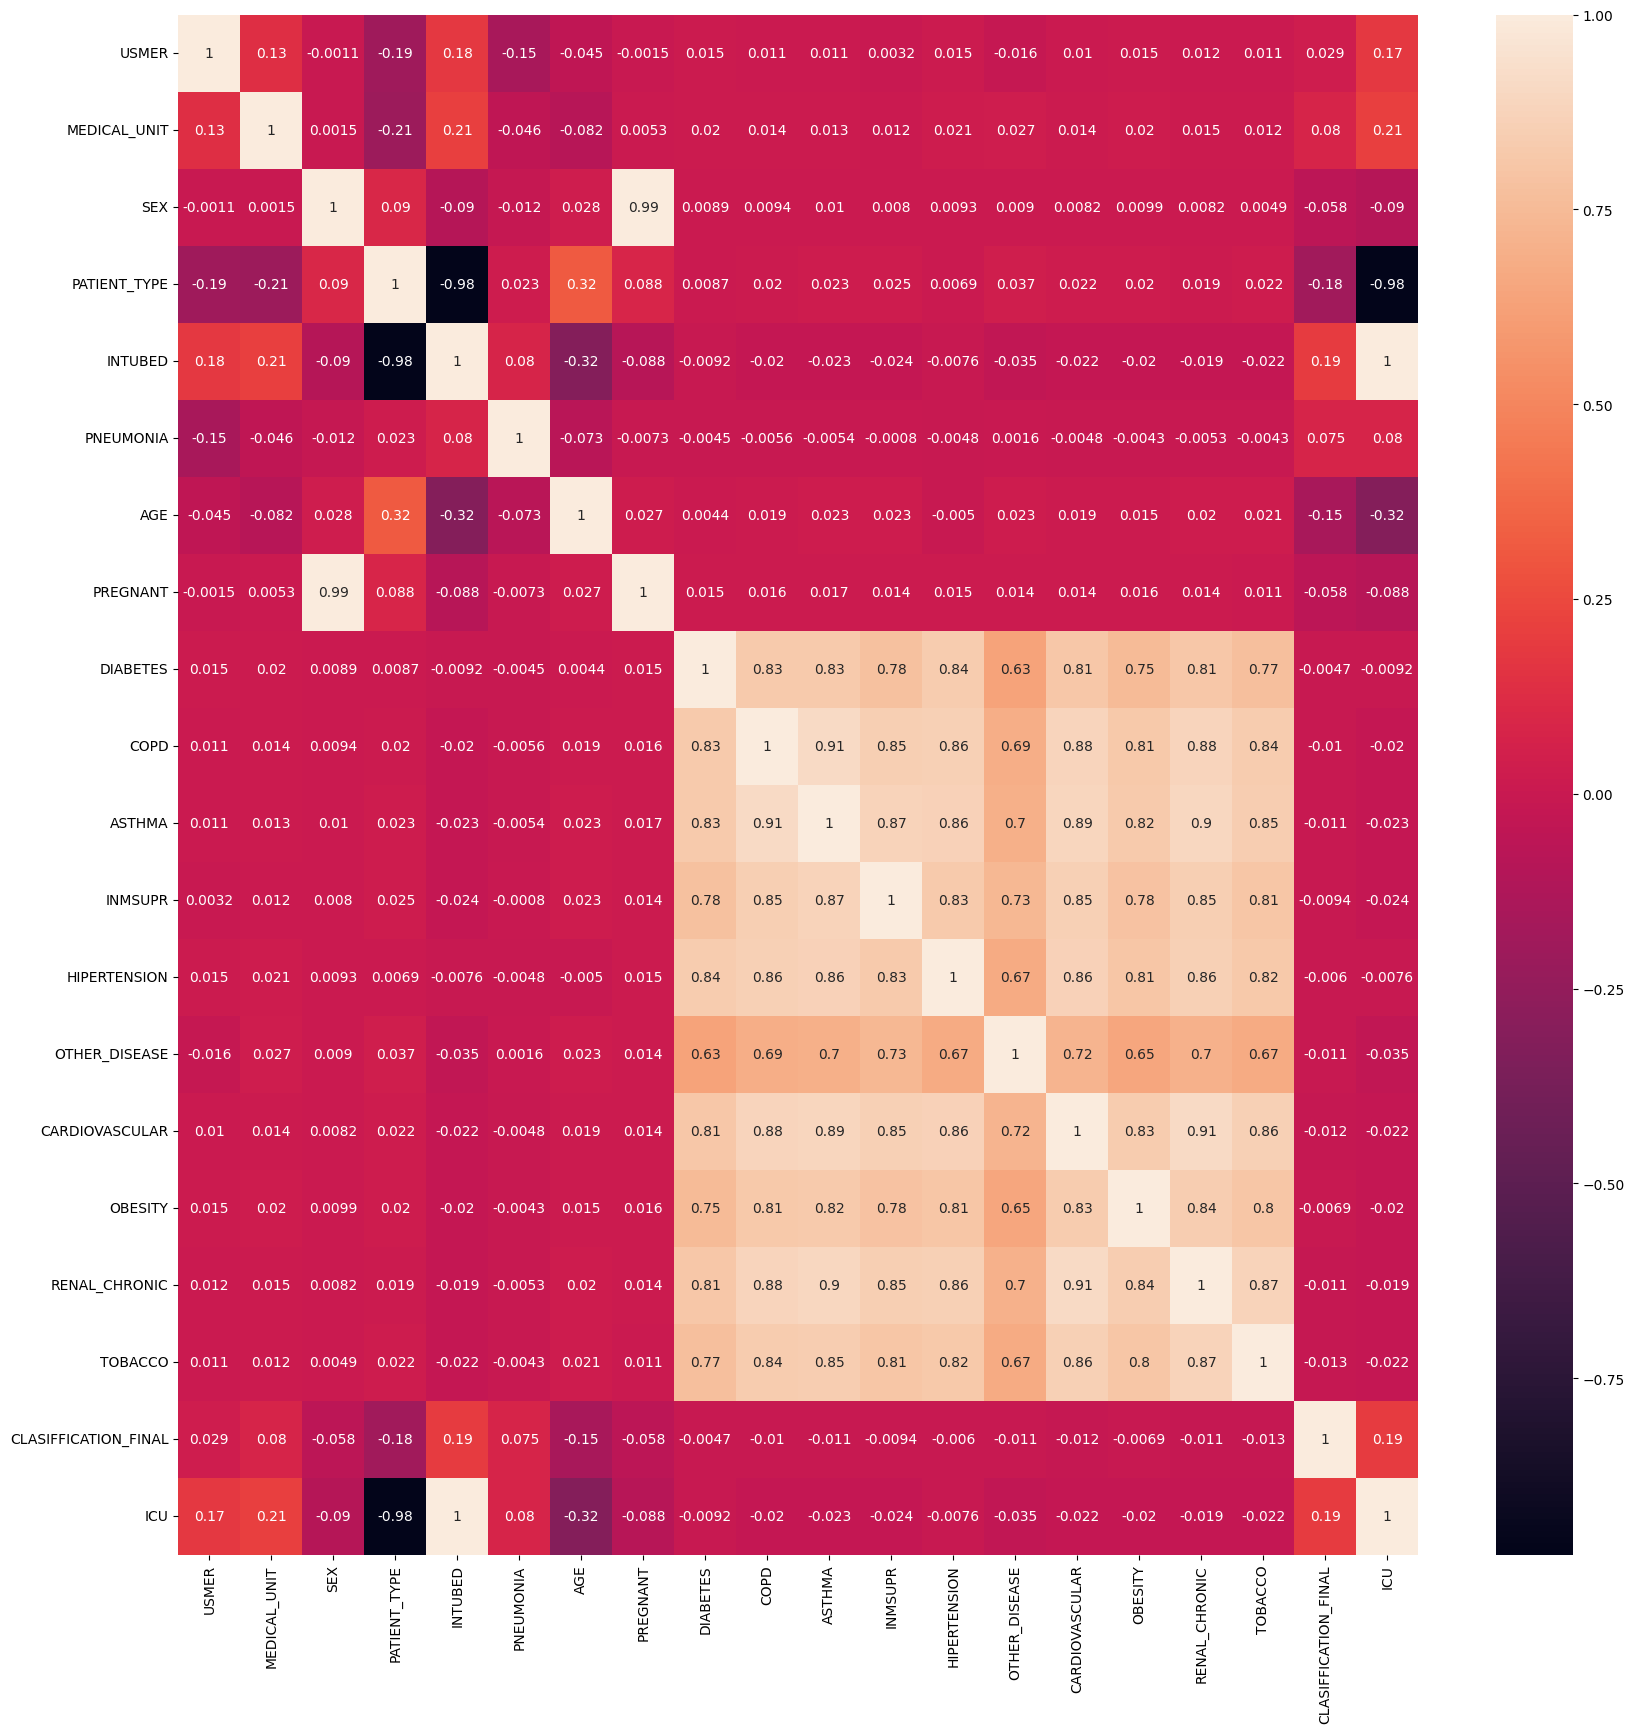

In [6]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [7]:
corr['CLASIFFICATION_FINAL'].sort_values(ascending=False)

CLASIFFICATION_FINAL    1.000000
ICU                     0.193163
INTUBED                 0.193075
MEDICAL_UNIT            0.079981
PNEUMONIA               0.075351
USMER                   0.028840
DIABETES               -0.004739
HIPERTENSION           -0.006020
OBESITY                -0.006924
INMSUPR                -0.009412
COPD                   -0.010336
OTHER_DISEASE          -0.011143
ASTHMA                 -0.011178
RENAL_CHRONIC          -0.011342
CARDIOVASCULAR         -0.012143
TOBACCO                -0.012567
SEX                    -0.057782
PREGNANT               -0.057809
AGE                    -0.152637
PATIENT_TYPE           -0.183370
Name: CLASIFFICATION_FINAL, dtype: float64

Data Cleaning

In [8]:
totalMissing = df.isna().sum().sort_values()
missingData = pd.concat([totalMissing], axis=1, keys=["Total"])
missingData.tail(5)

,Total
PATIENT_TYPE,0
SEX,0
MEDICAL_UNIT,0
DIABETES,0
ICU,0


Modeling

In [9]:
y = df['CLASIFFICATION_FINAL']
X = df.drop(["CLASIFFICATION_FINAL", "DATE_DIED"], axis = 1)
print(X.shape, y.shape)

(1048575, 19) (1048575,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
print(X_train.shape, y_train.shape)

(786431, 19) (786431,)


In [12]:
acc = []

In [14]:
# Linear Reg

LinR = LinearRegression()
LinR.fit(X_train, y_train)
acc.append(LinR.score(X_test, y_test))
print(acc)

MemoryError: Unable to allocate 114. MiB for an array with shape (786431, 19) and data type float64

In [ ]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
acc.append(Tree.score(X_test, y_test))
print(acc)

[0.052354963109248476, 0.5232100708103855]


In [ ]:
K = 10
kn = []
for i in range(1, K):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    kn.append(KNN.score(X_test, y_test))
print(kn)

MemoryError: Unable to allocate 122. MiB for an array with shape (838860, 19) and data type float64